## mlr3：模型评价

如何使用mlr3创建任务和学习器、拟合模型、预测和简单的评价，本篇将模型评价的一些细节问题，展示mlr3如何使得这些步骤变得更加简单！

## 二分类变量和ROC曲线
对于二分类变量，结果有阴性和阳性两种，而且判定阴性和阳性的阈值是可以认为设定的。ROC曲线可以很好的帮助我们确定最佳的分割点。

首先看一下如何获取一个分类变量的混淆矩阵：


In [1]:
library(mlr3verse)


Loading required package: mlr3



In [2]:
# 在R语言中，data()函数用于获取已经内置的数据集或者其他R包中的数据集。
data("Sonar", package = "mlbench")


# name：要获取的数据集的名称。
# package：可选参数，指定数据集所在的R包的名称。


In [3]:
head(Sonar)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,⋯,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,⋯,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,⋯,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,⋯,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,⋯,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,⋯,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
str(Sonar)


'data.frame':	208 obs. of  61 variables:
 $ V1   : num  0.02 0.0453 0.0262 0.01 0.0762 0.0286 0.0317 0.0519 0.0223 0.0164 ...
 $ V2   : num  0.0371 0.0523 0.0582 0.0171 0.0666 0.0453 0.0956 0.0548 0.0375 0.0173 ...
 $ V3   : num  0.0428 0.0843 0.1099 0.0623 0.0481 ...
 $ V4   : num  0.0207 0.0689 0.1083 0.0205 0.0394 ...
 $ V5   : num  0.0954 0.1183 0.0974 0.0205 0.059 ...
 $ V6   : num  0.0986 0.2583 0.228 0.0368 0.0649 ...
 $ V7   : num  0.154 0.216 0.243 0.11 0.121 ...
 $ V8   : num  0.16 0.348 0.377 0.128 0.247 ...
 $ V9   : num  0.3109 0.3337 0.5598 0.0598 0.3564 ...
 $ V10  : num  0.211 0.287 0.619 0.126 0.446 ...
 $ V11  : num  0.1609 0.4918 0.6333 0.0881 0.4152 ...
 $ V12  : num  0.158 0.655 0.706 0.199 0.395 ...
 $ V13  : num  0.2238 0.6919 0.5544 0.0184 0.4256 ...
 $ V14  : num  0.0645 0.7797 0.532 0.2261 0.4135 ...
 $ V15  : num  0.066 0.746 0.648 0.173 0.453 ...
 $ V16  : num  0.227 0.944 0.693 0.213 0.533 ...
 $ V17  : num  0.31 1 0.6759 0.0693 0.7306 ...
 $ V18  : num  0.

In [5]:
task <- as_task_classif(Sonar,
    target = "Class",
    positive = "M"
) # 指定阳性


In [6]:
learner <- lrn("classif.rpart",
    predict_type = "prob"
) # 指定预测类型


In [7]:
prediction <- learner$train(task)$predict(task)


In [8]:
prediction


<PredictionClassif> for 208 observations:
    row_ids truth response    prob.M    prob.R
          1     R        R 0.1060606 0.8939394
          2     R        M 0.7333333 0.2666667
          3     R        R 0.0000000 1.0000000
---                                           
        206     M        M 0.9250000 0.0750000
        207     M        M 0.9250000 0.0750000
        208     M        M 0.9250000 0.0750000

In [9]:
conf <- prediction$confusion
print(conf)


        truth
response  M  R
       M 95 10
       R 16 87


## 绘制ROC曲线也是非常方便：


In [10]:
prediction


<PredictionClassif> for 208 observations:
    row_ids truth response    prob.M    prob.R
          1     R        R 0.1060606 0.8939394
          2     R        M 0.7333333 0.2666667
          3     R        R 0.0000000 1.0000000
---                                           
        206     M        M 0.9250000 0.0750000
        207     M        M 0.9250000 0.0750000
        208     M        M 0.9250000 0.0750000

In [11]:
library("mlr3viz")


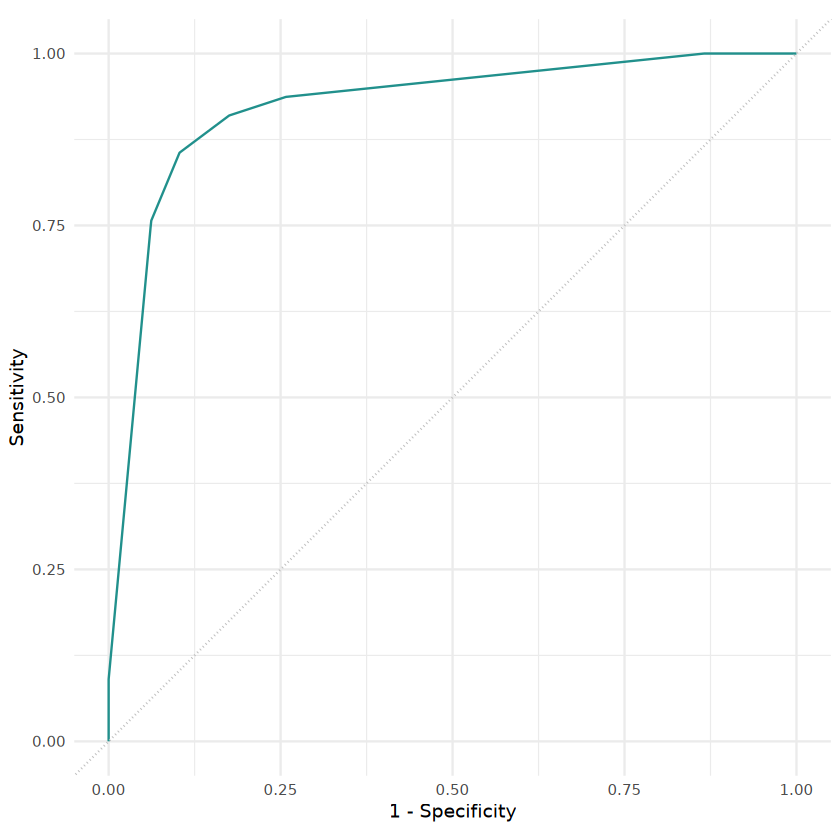

In [12]:
mlr3viz::autoplot(prediction, type = "roc")


也可以非常方便的绘制PRC曲线：

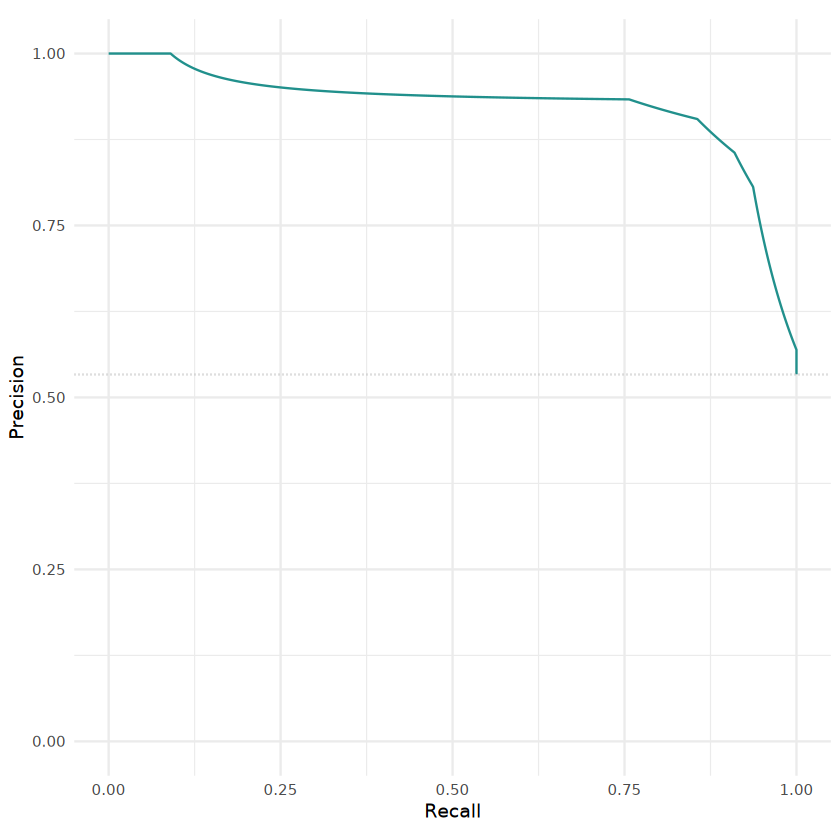

In [13]:
autoplot(prediction, type = "prc")


## 重抽样
mlr3支持的重抽样方法：

- cross validation ("cv"),
- leave-one-out cross validation ("loo"),
- repeated cross validation ("repeated_cv"),
- otstrapping ("bootstrap"),
- subsampling ("subsampling"),
- holdout ("holdout"),
- in-sample resampling ("insample"),
- custom resampling ("custom").

查看重抽样的方法：

In [14]:
library(mlr3verse)
as.data.table(mlr_resamplings)


key,label,params,iters
<chr>,<chr>,<list>,<int>
bootstrap,Bootstrap,"ratio , repeats",30
custom,Custom Splits,,NA
custom_cv,Custom Split Cross-Validation,,NA
cv,Cross-Validation,folds,10
holdout,Holdout,ratio,1
insample,Insample Resampling,,1
loo,Leave-One-Out,,NA
repeated_cv,Repeated Cross-Validation,"folds , repeats",100
subsampling,Subsampling,"ratio , repeats",30


还有一些特殊类型的重抽样方法可以通过扩展包实现，比如`mlr3spatiotemporal`包。

默认的方法是`holdout`：

In [15]:
resampling <- rsmp("holdout")
print(resampling)


<ResamplingHoldout>: Holdout
* Iterations: 1
* Instantiated: FALSE
* Parameters: ratio=0.6667


可以通过以下方法改变比例：

In [16]:
resampling$param_set$values <- list(ratio = 0.8)
# 或者
rsmp("holdout", ratio = 0.8)


<ResamplingHoldout>: Holdout
* Iterations: 1
* Instantiated: FALSE
* Parameters: ratio=0.8

下面一个例子使用5折交叉验证方法，建立一个决策树模型：

In [17]:
library(mlr3verse)
task <- tsk("penguins") # 创建任务
learner <- lrn("classif.rpart", predict_type = "prob") # 创建学习器，设定预测的结果是概率
resampling <- rsmp("cv", folds = 5) # 选择重抽样方法


In [18]:
rr <- resample(task,
    learner,
    resampling,
    store_models = T
) # 1行代码搞定


INFO  [06:04:50.124] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 1/5)
INFO  [06:04:50.156] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 2/5)
INFO  [06:04:50.172] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 3/5)
INFO  [06:04:50.182] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 4/5)
INFO  [06:04:50.192] [mlr3] Applying learner 'classif.rpart' on task 'penguins' (iter 5/5)


In [19]:
print(rr)


<ResampleResult> with 5 resampling iterations
  task_id    learner_id resampling_id iteration warnings errors
 penguins classif.rpart            cv         1        0      0
 penguins classif.rpart            cv         2        0      0
 penguins classif.rpart            cv         3        0      0
 penguins classif.rpart            cv         4        0      0
 penguins classif.rpart            cv         5        0      0


获得平均的模型表现

In [20]:
rr$aggregate(msr("classif.acc"))


classif.acc 
  0.9360614

获得单个模型的表现

In [24]:
rr$score(msr("classif.acc"))


task,task_id,learner,learner_id,resampling,resampling_id,iteration,prediction,classif.acc
<list>,<chr>,<list>,<chr>,<list>,<chr>,<int>,<list>,<dbl>
<environment: 0x55665ed85450>,penguins,<environment: 0x55665a349390>,classif.rpart,<environment: 0x55665f206b00>,cv,1,<environment: 0x55665ad6f8a0>,0.9420290
<environment: 0x55665ed85450>,penguins,<environment: 0x55665a456dd8>,classif.rpart,<environment: 0x55665f206b00>,cv,2,<environment: 0x55665ada5aa8>,0.8985507
<environment: 0x55665ed85450>,penguins,<environment: 0x556659808708>,classif.rpart,<environment: 0x55665f206b00>,cv,3,<environment: 0x55665adddcb0>,0.9710145
<environment: 0x55665ed85450>,penguins,<environment: 0x55665a5ea0d0>,classif.rpart,<environment: 0x55665f206b00>,cv,4,<environment: 0x55665ae15f98>,0.9275362
<environment: 0x55665ed85450>,penguins,<environment: 0x55665a7066f8>,classif.rpart,<environment: 0x55665f206b00>,cv,5,<environment: 0x55665ae628a0>,0.9411765


In [21]:
rr$score(msr("classif.acc"))[, 7:9]


iteration,prediction,classif.acc
<int>,<list>,<dbl>
1,<environment: 0x5566558d9398>,0.9420290
2,<environment: 0x5566557d5a68>,0.8985507
3,<environment: 0x5566557824d8>,0.9710145
4,<environment: 0x556655734e30>,0.9275362
5,<environment: 0x5566556ec5d0>,0.9411765


检查警告或者错误：

In [22]:
rr$warnings


iteration,msg
<int>,<chr>


In [23]:
rr$errors


iteration,msg
<int>,<chr>


取出单个模型

In [25]:
rr$learners


[[1]]
<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: rpart
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  response, [prob]
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights

[[2]]
<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: rpart
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  response, [prob]
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights

[[3]]
<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: rpart
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  response, [prob]
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights

[[4]]
<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: rpart
* Pa

In [26]:
rr$learners[5]


[[1]]
<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: rpart
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  response, [prob]
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights


In [27]:
rr$learners[[5]]$model


n= 276 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 276 160 Adelie (0.420289855 0.217391304 0.362318841)  
  2) flipper_length< 206.5 170  56 Adelie (0.670588235 0.323529412 0.005882353)  
    4) bill_length< 42.35 108   1 Adelie (0.990740741 0.009259259 0.000000000) *
    5) bill_length>=42.35 62   8 Chinstrap (0.112903226 0.870967742 0.016129032) *
  3) flipper_length>=206.5 106   7 Gentoo (0.018867925 0.047169811 0.933962264)  
    6) island=Dream,Torgersen 7   2 Chinstrap (0.285714286 0.714285714 0.000000000) *
    7) island=Biscoe 99   0 Gentoo (0.000000000 0.000000000 1.000000000) *

这个包也可以和其他决策树可视化R包无缝衔接，比如非常画图非常好看的`rpart.plot`:

Loading required package: rpart



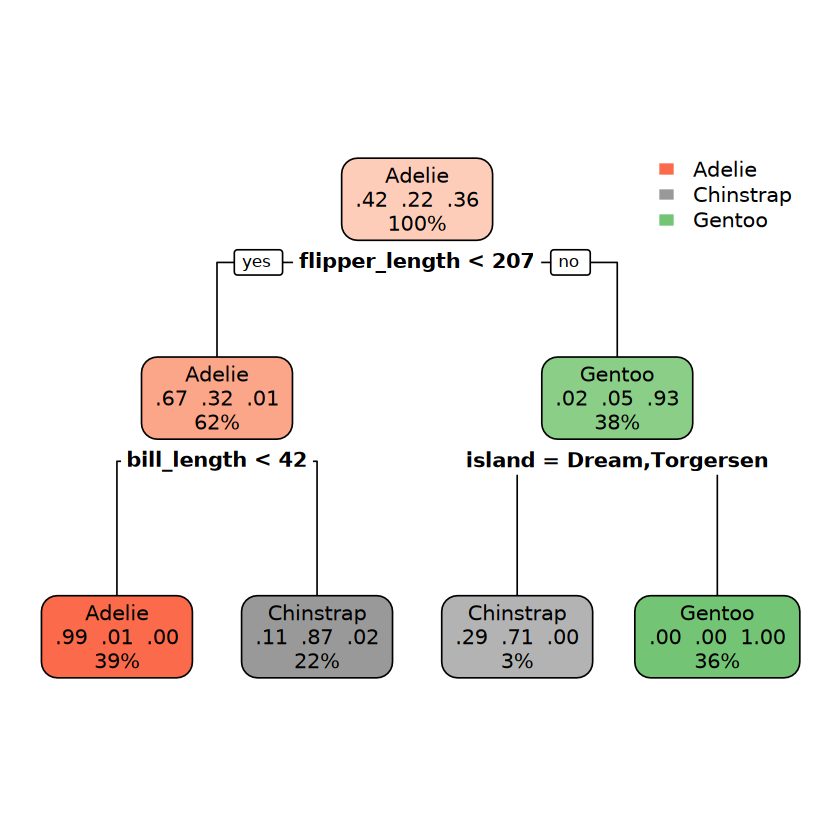

In [29]:
library(rpart.plot)
## 载入需要的程辑包：rpart
rpart.plot(rr$learners[[5]]$model)


## 查看预测结果：


In [32]:
str(rr)


Classes 'ResampleResult', 'R6' <ResampleResult> 


In [33]:
ls(rr)


[1] "aggregate"   "clone"       "discard"     "errors"      "filter"     
 [6] "format"      "help"        "initialize"  "iters"       "learner"    
[11] "learners"    "marshal"     "prediction"  "predictions" "print"      
[16] "resampling"  "score"       "task"        "task_type"   "uhash"      
[21] "unmarshal"   "warnings"

In [31]:
rr


<ResampleResult> with 5 resampling iterations
  task_id    learner_id resampling_id iteration warnings errors
 penguins classif.rpart            cv         1        0      0
 penguins classif.rpart            cv         2        0      0
 penguins classif.rpart            cv         3        0      0
 penguins classif.rpart            cv         4        0      0
 penguins classif.rpart            cv         5        0      0

In [39]:
rr$prediction()


<PredictionClassif> for 137 observations:
    row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
          3    Adelie    Adelie   0.9596774     0.04032258  0.00000000
          4    Adelie    Adelie   0.9596774     0.04032258  0.00000000
          8    Adelie    Adelie   0.9596774     0.04032258  0.00000000
---                                                                   
        322 Chinstrap Chinstrap   0.1129032     0.87096774  0.01612903
        327 Chinstrap Chinstrap   0.1129032     0.87096774  0.01612903
        336 Chinstrap Chinstrap   0.1129032     0.87096774  0.01612903

In [40]:
rr$predictions()


[[1]]
<PredictionClassif> for 69 observations:
    row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
          3    Adelie    Adelie  0.95967742     0.04032258  0.00000000
          4    Adelie    Adelie  0.95967742     0.04032258  0.00000000
          8    Adelie    Adelie  0.95967742     0.04032258  0.00000000
---                                                                   
        338 Chinstrap Chinstrap  0.06976744     0.90697674  0.02325581
        341 Chinstrap    Adelie  0.95967742     0.04032258  0.00000000
        344 Chinstrap Chinstrap  0.06976744     0.90697674  0.02325581

[[2]]
<PredictionClassif> for 68 observations:
    row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
          2    Adelie    Adelie   0.9907407    0.009259259  0.00000000
          9    Adelie    Adelie   0.9907407    0.009259259  0.00000000
         14    Adelie    Adelie   0.9907407    0.009259259  0.00000000
---                                                  

In [36]:
# 查看单个预测结果
rr$predictions()[[1]]


<PredictionClassif> for 69 observations:
    row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
          5    Adelie    Adelie  0.97540984     0.02459016  0.00000000
         16    Adelie    Adelie  0.97540984     0.02459016  0.00000000
         18    Adelie    Adelie  0.97540984     0.02459016  0.00000000
---                                                                   
        334 Chinstrap Chinstrap  0.07142857     0.91071429  0.01785714
        340 Chinstrap    Gentoo  0.02061856     0.03092784  0.94845361
        342 Chinstrap Chinstrap  0.07142857     0.91071429  0.01785714

提取特定iteration的结果

In [37]:
rr$filter(c(3, 5))
print(rr)


<ResampleResult> with 2 resampling iterations
  task_id    learner_id resampling_id iteration warnings errors
 penguins classif.rpart            cv         3        0      0
 penguins classif.rpart            cv         5        0      0


可视化结果：

In [41]:
task <- tsk("pima") # 非常著名的糖尿病数据集
task$select(c("glucose", "mass"))
learner <- lrn("classif.rpart", predict_type = "prob")
resampling <- rsmp("cv")
rr <- resample(task, learner, resampling, store_models = T)


INFO  [06:23:36.550] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 1/10)
INFO  [06:23:36.562] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 2/10)
INFO  [06:23:36.575] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 3/10)
INFO  [06:23:36.587] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 4/10)
INFO  [06:23:36.606] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 5/10)
INFO  [06:23:36.621] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 6/10)
INFO  [06:23:36.634] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 7/10)
INFO  [06:23:36.647] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 8/10)
INFO  [06:23:36.660] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 9/10)
INFO  [06:23:36.672] [mlr3] Applying learner 'classif.rpart' on task 'pima' (iter 10/10)


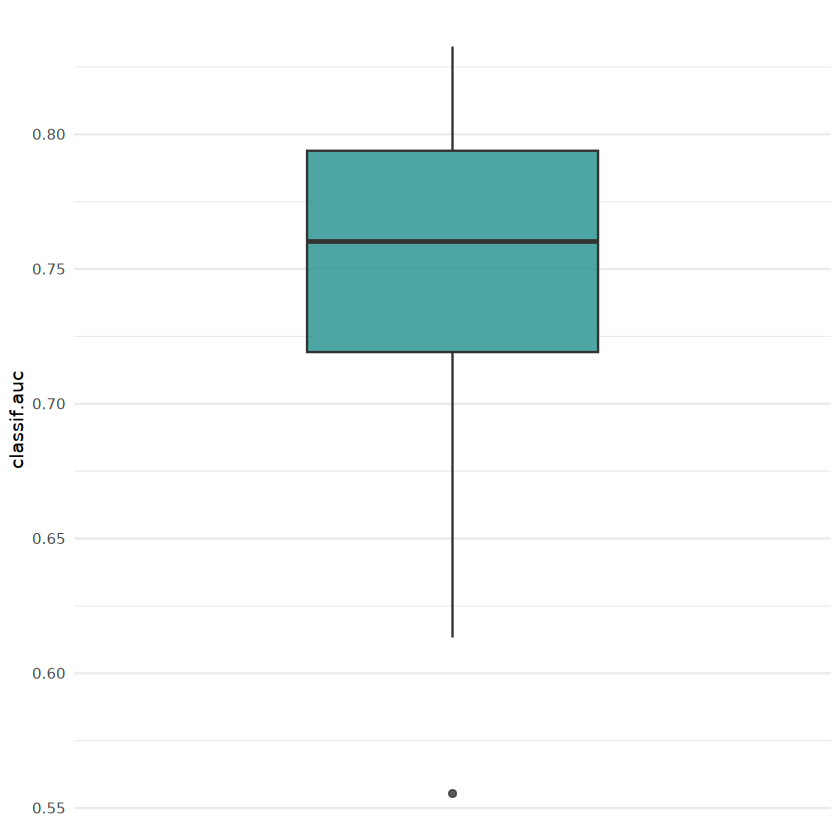

In [42]:
autoplot(rr, measure = msr("classif.auc"))


ROC曲线：10折交叉验证平均后的：

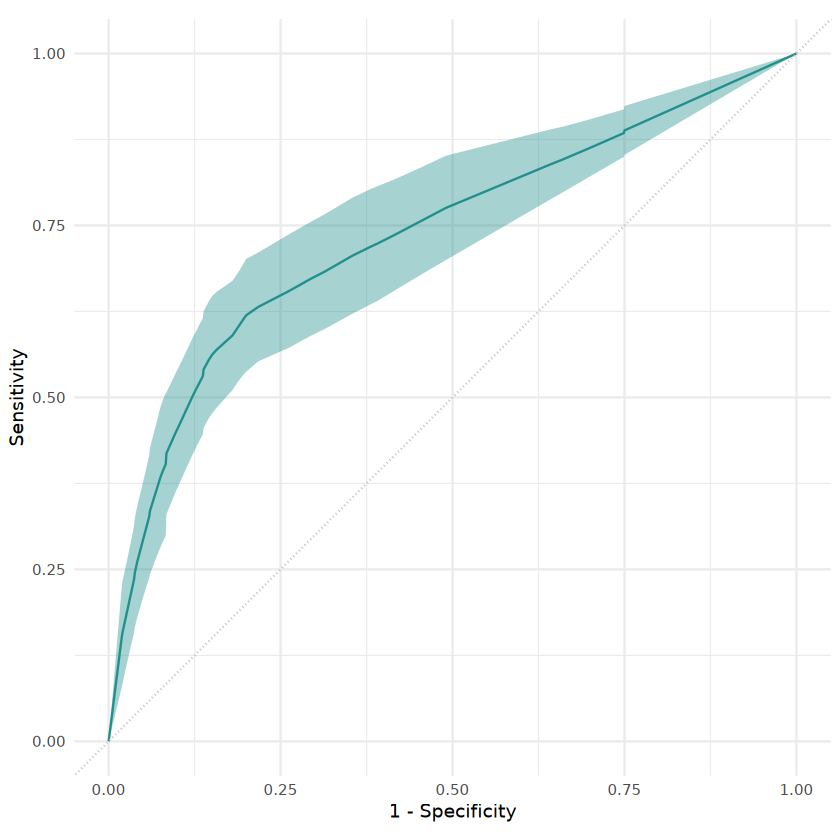

In [43]:
autoplot(rr, type = "roc")


树状图：

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”


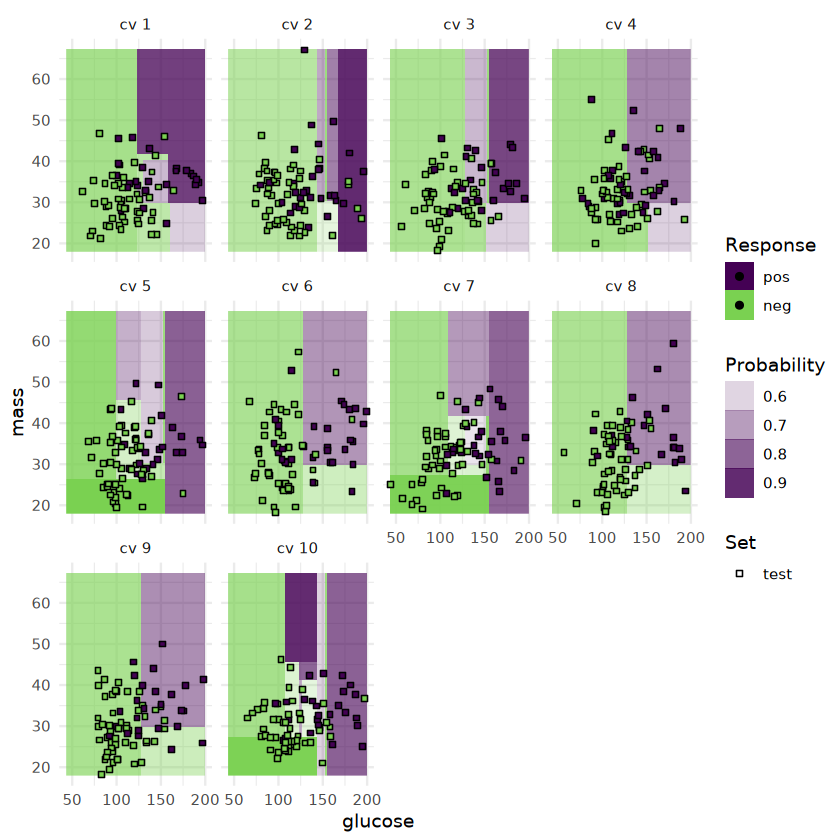

In [44]:
autoplot(rr, type = "prediction")


所有支持的可视化类型可在此处找到：autoplot.ResampleResult

内容太多了，明天学习多个模型的比较！